In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC, SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score

from sklearn.metrics import r2_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
df = pd.read_csv("pd_speech_features.csv")

In [9]:
df.shape

(756, 755)

In [11]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [12]:
nulls= df.isnull().sum()

In [13]:
nulls

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [14]:
nulls_dict = nulls.to_dict()

In [15]:
for key, value in nulls.items():
  if value != 0:
    print(key)

In [16]:
pd.crosstab(df["class"], df["gender"])

gender,0,1
class,,
0,123,69
1,243,321


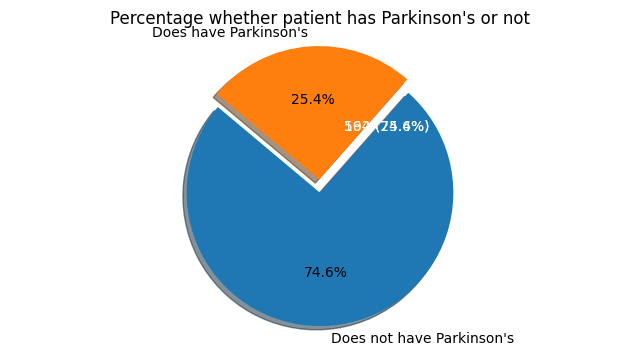

In [29]:
condition = ["Does not have Parkinson's", "Does have Parkinson's"]

have_or_not = df["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

explode = [0, 0.1]

plt.figure(figsize=(8, 4))

plt.pie(values, labels=condition, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title("Percentage whether patient has Parkinson's or not")
for i, v in enumerate(values):
   plt.text(0.5, 0.5, f'{v} ({values[i]/sum(values)*100:.1f}%)', color='white', ha='center', va='center')

plt.axis('equal')

plt.show()

In [30]:
x= df.iloc[:, 0:754].values
y= df.iloc[:, -1].values

In [33]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [40]:
x_train.shape

(604, 754)

In [43]:
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [45]:
y_pred =classifier.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred)*100

86.8421052631579

In [47]:
np.random.seed(42)

In [48]:
model = LinearSVC()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.8289473684210527


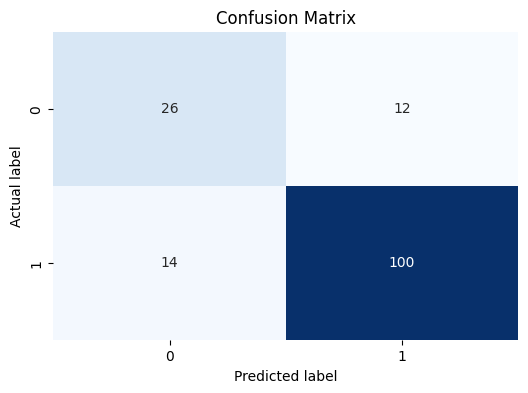

In [49]:
prediction = model.predict(x_test)
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues', cbar= False);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

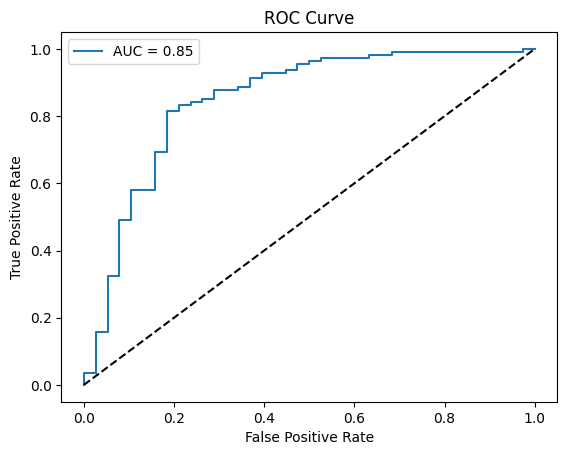

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = model.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier class

model = RandomForestClassifier() # Correct the typo in the class name
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.868421052631579


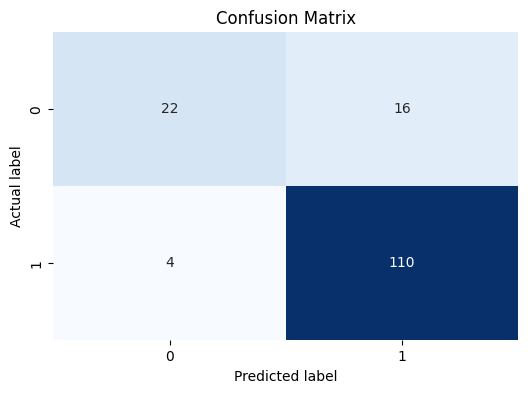

In [56]:
prediction = model.predict(x_test)
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues', cbar= False);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

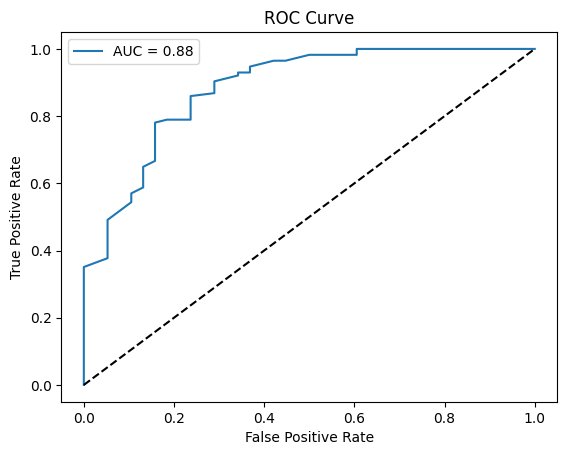

In [57]:
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [58]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.8881578947368421


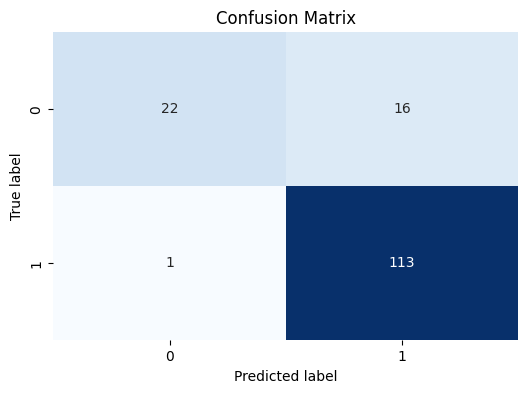

In [59]:
prediction = model.predict(x_test)
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues', cbar= False);
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

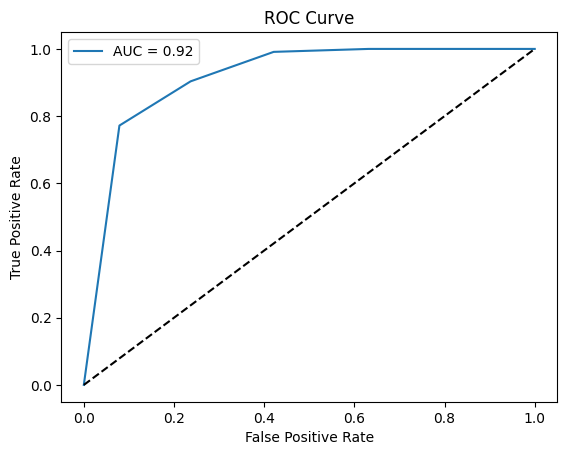

In [60]:
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [61]:
model = BaggingClassifier()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.8223684210526315


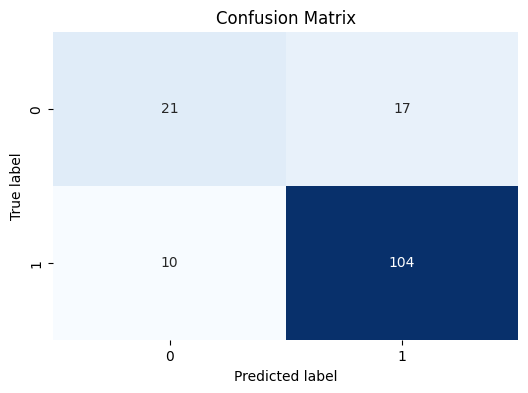

In [62]:
prediction = model.predict(x_test)
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues', cbar= False);
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

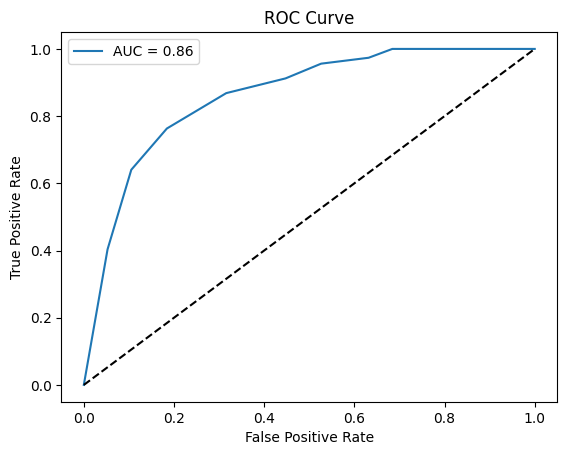

In [63]:
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()